# Machine Learning 101

This is a jump start exercise in machine learning using TensorFlow 2.0. In this exercise, we will build, train, and valdate a Neural Network model which will say whether a given image is of a Cat or not!

## Setup Runtime and Install the necessary packages.

Set the runtime to GPU.

Clone the repo.

Python packages can be installed by pip. To install a package, type "pip install package_name" at the terminal. 

You can execute commands on terminal from Jupyter notebook simply by prepending "!" to the command.

Warning: Do not run Jupyter Notebooks from untrusted sources.

In [ ]:
!pip install numpy h5py matplotlib scikit-learn tensorflow-gpu==2.0

In [ ]:
!git clone https://github.com/quantumcoyote/ML_Workshop.git

In [ ]:
parent_dir = 'ML_Workshop/'

Import the necessary libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import h5py
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [2]:
# load data
train = h5py.File(parent_dir + 'data/cat/train_catvnoncat.h5', 'r')
x_train = np.array(train["train_set_x"][:])
y_train = np.array(train["train_set_y"][:])

test = h5py.File(parent_dir + 'data/cat/test_catvnoncat.h5', 'r')
x_test = np.array(test["test_set_x"][:])
y_test = np.array(test["test_set_y"][:])

### Explore the data

In [3]:
print('Number of training examples: {}'.format(x_train.shape[0]))
print('Number of test examples: {}'.format(x_test.shape[0]))
print('Dimension of an image is: {}'.format(x_train[0].shape))
print('Shape of train set features : {}'.format(x_train.shape))
print('Shape of train set values : {}'.format(y_train.shape))
print('Shape of test set features : {}'.format(x_test.shape))
print('Shape of test set values : {}'.format(y_test.shape))

Number of training examples: 209
Number of test examples: 50
Dimension of an image is: (64, 64, 3)
Shape of train set features : (209, 64, 64, 3)
Shape of train set values : (209,)
Shape of test set features : (50, 64, 64, 3)
Shape of test set values : (50,)


In [4]:
def plot_images(images_arr, labels_arr):
    """
    This function will plot images in the form of a grid with 1 row and 5 columns 
    where images are placed in each column.
    
    credits to TensorFlow Team
    https://www.tensorflow.org/tutorials/images/classification
    """
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels_arr, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('Cat' if label else "Not a Cat")
    plt.show()


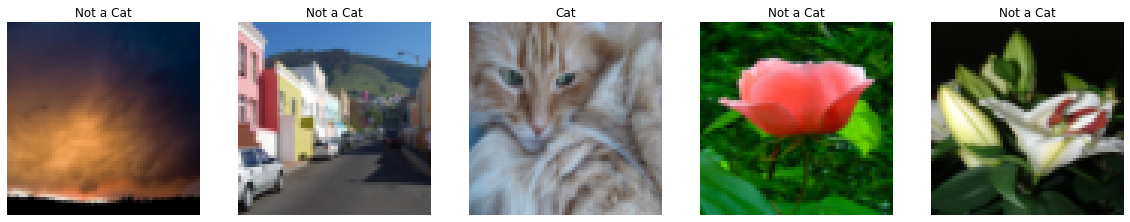

In [5]:
plot_images(x_train[:5], y_train[:5])

In [6]:
# reshape data
image_flat_dim = 64 * 64 * 3

x_train = x_train.reshape(-1, image_flat_dim)/255  # Normalize and reshape the input
y_train = y_train.reshape(-1, 1)

x_test = x_test.reshape(-1, image_flat_dim)/255
y_test = y_test.reshape(-1, 1)

In [7]:
print('Number of training examples: {}'.format(x_train.shape[0]))
print('Number of test examples: {}'.format(x_test.shape[0]))
print('Dimension of an image is: {}'.format(x_train[0].shape))
print('Shape of train set features : {}'.format(x_train.shape))
print('Shape of train set values : {}'.format(y_train.shape))
print('Shape of test set features : {}'.format(x_test.shape))
print('Shape of test set values : {}'.format(y_test.shape))

Number of training examples: 209
Number of test examples: 50
Dimension of an image is: (12288,)
Shape of train set features : (209, 12288)
Shape of train set values : (209, 1)
Shape of test set features : (50, 12288)
Shape of test set values : (50, 1)


## Create and train model

The model consists of two hidden layers with 128 neurons in each layer. Relu activation function is used for the hidden layers and sigmoid is used for output layer.

In [27]:
model = Sequential([
    Dense(64, input_shape=(image_flat_dim,), activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

## Compile the model
The input is the flattend image (shape = 64 * 64 * 3) and the output is the probability that given image is of a cat. If the probability is > 0.5, then it will be classified as cat.
For this model, we will use ADAM as the optimizer with default learing rate of 0.001. Binary cross entropy is used as loss function.

In [28]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# print summary 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                786496    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 16)                1040      
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 5         
Total params: 787,609
Trainable params: 787,609
Non-trainable params: 0
________________________________________________

### Fit the model

In [29]:
epochs = 250
history = model.fit(x_train, y_train, epochs=epochs, verbose=2)

Train on 209 samples
Epoch 1/250
209/209 - 1s - loss: 0.7865 - accuracy: 0.6316
Epoch 2/250
209/209 - 0s - loss: 0.7033 - accuracy: 0.6507
Epoch 3/250
209/209 - 0s - loss: 0.6741 - accuracy: 0.6459
Epoch 4/250
209/209 - 0s - loss: 0.6644 - accuracy: 0.6651
Epoch 5/250
209/209 - 0s - loss: 0.6905 - accuracy: 0.6507
Epoch 6/250
209/209 - 0s - loss: 0.6914 - accuracy: 0.6507
Epoch 7/250
209/209 - 0s - loss: 0.7246 - accuracy: 0.6411
Epoch 8/250
209/209 - 0s - loss: 0.6679 - accuracy: 0.6603
Epoch 9/250
209/209 - 0s - loss: 0.6915 - accuracy: 0.6555
Epoch 10/250
209/209 - 0s - loss: 0.7120 - accuracy: 0.6555
Epoch 11/250
209/209 - 0s - loss: 0.6583 - accuracy: 0.6459
Epoch 12/250
209/209 - 0s - loss: 0.6741 - accuracy: 0.6555
Epoch 13/250
209/209 - 0s - loss: 0.6550 - accuracy: 0.6603
Epoch 14/250
209/209 - 0s - loss: 0.6706 - accuracy: 0.6603
Epoch 15/250
209/209 - 0s - loss: 0.6641 - accuracy: 0.6555
Epoch 16/250
209/209 - 0s - loss: 0.6581 - accuracy: 0.6651
Epoch 17/250
209/209 - 0s - 

Epoch 137/250
209/209 - 0s - loss: 0.2544 - accuracy: 0.8708
Epoch 138/250
209/209 - 0s - loss: 0.2425 - accuracy: 0.8995
Epoch 139/250
209/209 - 0s - loss: 0.2474 - accuracy: 0.8708
Epoch 140/250
209/209 - 0s - loss: 0.2165 - accuracy: 0.9043
Epoch 141/250
209/209 - 0s - loss: 0.2913 - accuracy: 0.8804
Epoch 142/250
209/209 - 0s - loss: 0.2470 - accuracy: 0.8947
Epoch 143/250
209/209 - 0s - loss: 0.2460 - accuracy: 0.8995
Epoch 144/250
209/209 - 0s - loss: 0.2983 - accuracy: 0.8804
Epoch 145/250
209/209 - 0s - loss: 0.3124 - accuracy: 0.8708
Epoch 146/250
209/209 - 0s - loss: 0.3043 - accuracy: 0.8852
Epoch 147/250
209/209 - 0s - loss: 0.3231 - accuracy: 0.8565
Epoch 148/250
209/209 - 0s - loss: 0.2836 - accuracy: 0.8900
Epoch 149/250
209/209 - 0s - loss: 0.3079 - accuracy: 0.8708
Epoch 150/250
209/209 - 0s - loss: 0.2631 - accuracy: 0.9139
Epoch 151/250
209/209 - 0s - loss: 0.2297 - accuracy: 0.9234
Epoch 152/250
209/209 - 0s - loss: 0.2255 - accuracy: 0.9378
Epoch 153/250
209/209 - 

### Visulaizing the training results

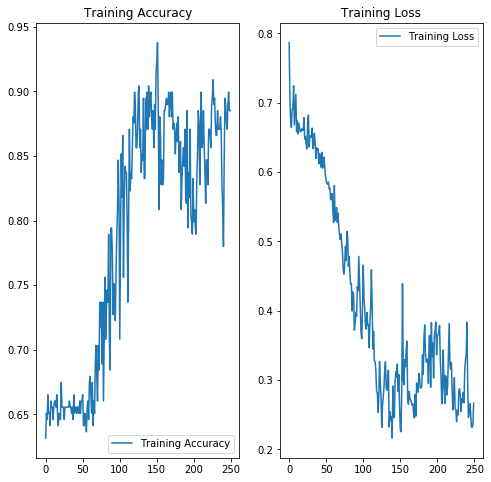

In [30]:
acc = history.history['accuracy']

loss = history.history['loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.legend(loc='lower right')
plt.title('Training Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.legend(loc='upper right')
plt.title('Training Loss')
plt.show()


### Predict 

In [31]:
#
y_pred = model.predict(x_test) > 0.5

In [32]:
print(y_pred[:5])

[[ True]
 [ True]
 [ True]
 [ True]
 [ True]]


In [33]:
print("Accuracy of prediction is: {}".format(accuracy_score(y_test, y_pred)))

Accuracy of prediction is: 0.76


In [34]:
def plot_images(images_arr, labels_arr_true, labels_arr_pred):
    """
    This function will plot images in the form of a grid with 1 row and 5 columns 
    where images are placed in each column.
    
    credits to TensorFlow Team
    https://www.tensorflow.org/tutorials/images/classification
    """
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, lbl_true, lbl_pred, ax in zip(images_arr, labels_arr_true, labels_arr_pred, axes):
        img = np.reshape(img, (64, 64, 3))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title('{0}, {1}'.format('Cat' if lbl_pred else 'Not a Cat', 'Cat' if lbl_true else 'Not a Cat'),
                    color='g' if lbl_pred==lbl_true else 'r')
    plt.show()

[31 36  2  4 16]


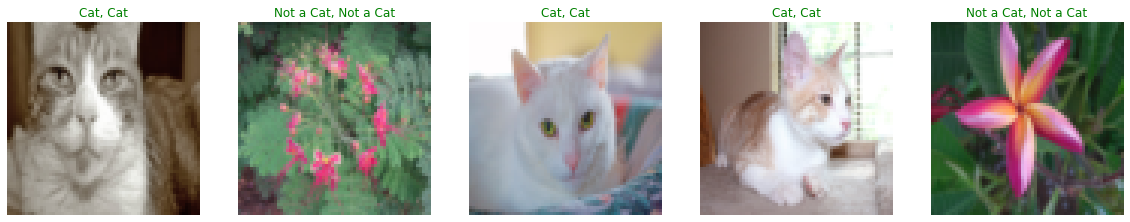

In [35]:
inds = np.random.choice(np.arange(50), 5)
print(inds)
plot_images(x_test[inds], labels_arr_true=y_test[inds], labels_arr_pred=y_pred[inds])

Since there are only 50 images in the test set, lets print them all.

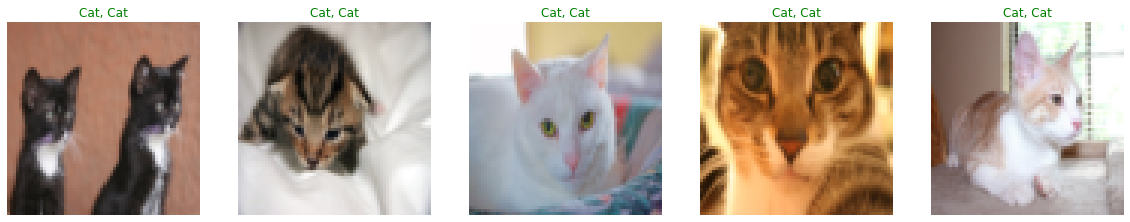

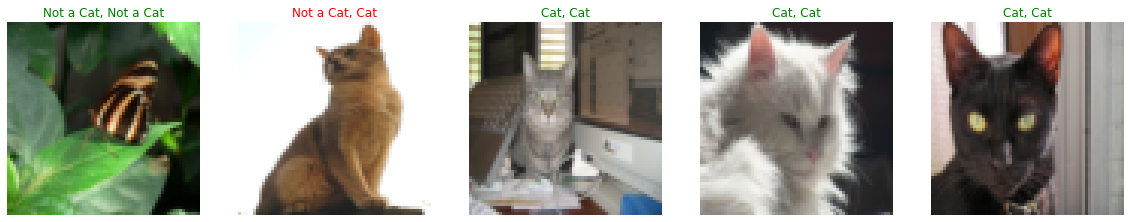

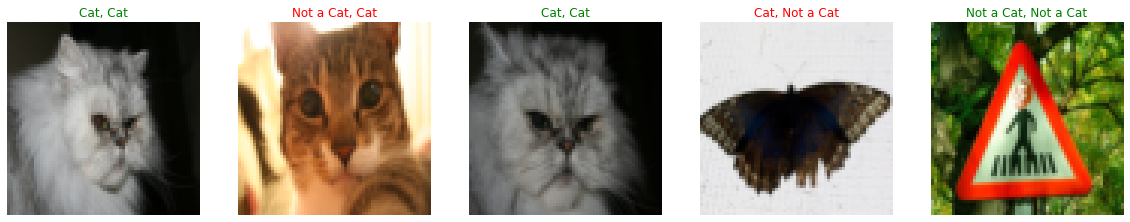

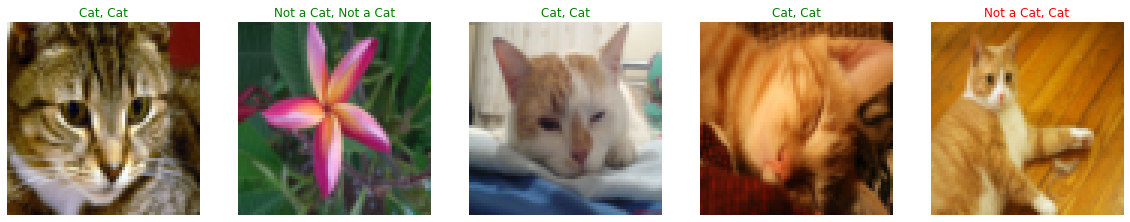

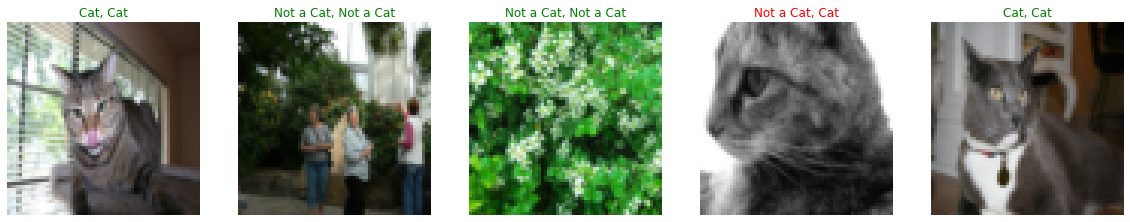

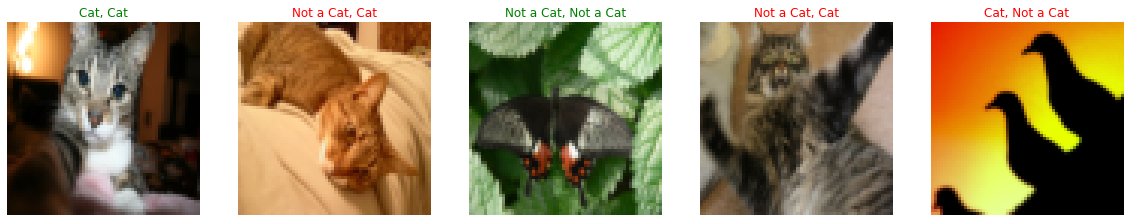

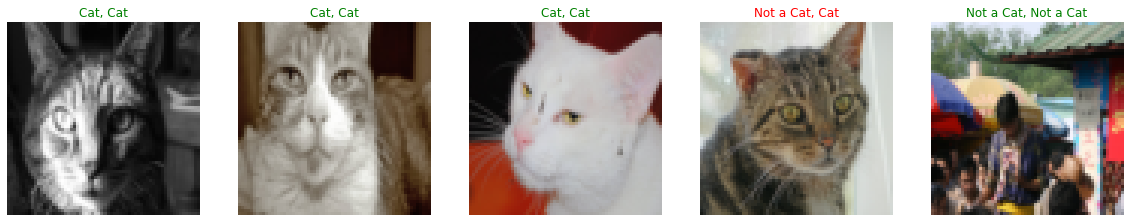

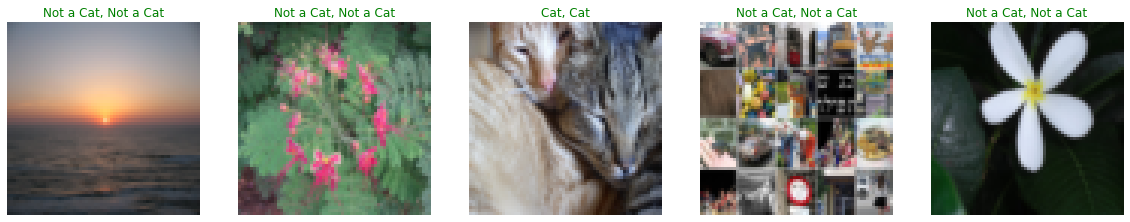

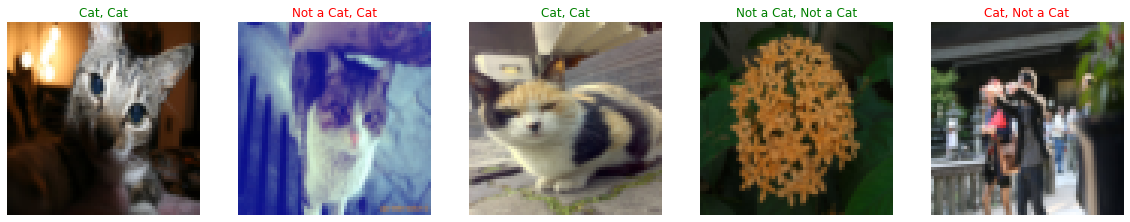

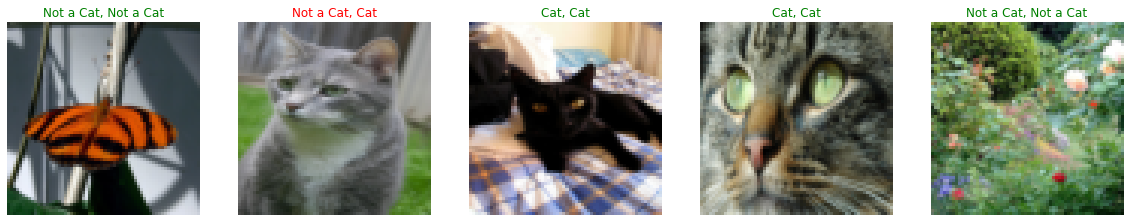

In [36]:
for i in range(10):
    inds = np.arange(i*5, (i*5)+5)
    plot_images(x_test[inds], labels_arr_true=y_test[inds], labels_arr_pred=y_pred[inds])